In [2]:
%tensorflow_version 1.x


In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #이 세개 거의 필수적

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input

import time


##디바이스
리스트 보기

In [4]:
from tensorflow.python.client import device_lib
print(tf.test.gpu_device_name())

/device:GPU:0


##NVIDIA GPU 상태보기

In [5]:
!nvidia-smi #리눅스 명령어: GPU의 상태를 출력함

Tue Aug 11 01:16:22 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.57       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   64C    P0    31W /  70W |    111MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

##데이터 준비

200
(200,)


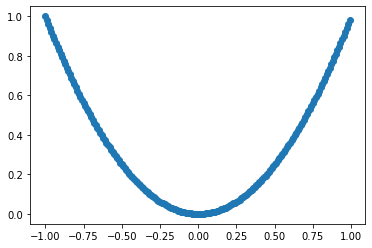

In [6]:
import numpy as np
x=np.arange(-1, 1, 0.01)
y=x**2
plt.scatter(x, y)

print(len(x))
print(x.shape)


##Keras DNN 최소코드에 기본 추가

In [19]:
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input

model=keras.Sequential()
#model.add(Input(1))
model.add(Dense(10, activation='tanh', input_shape=(1, )))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

#model.compile(optimizer='SGD', loss='mse')
model.compile(optimizer='SGD', loss='mse', metrics=['mse'])

#학습
model.fit(x, y, epochs=1000, verbose=0, batch_size=20)

#결과 출력
loss, mse = model.evaluate(x, y) #성능 평가하기: 숫자로 평가하고 평가된 값이 출력에 추가됨
print("loss=", loss)
print("mse=", mse)



200/200 [==============================] - 0s 178us/sample - loss: 0.0013 - mean_squared_error: 0.0013
loss= 0.001294975597411394
mse= 0.0012949756


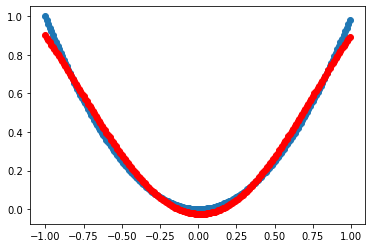

In [18]:
#예측
y_=model.predict(x)

plt.scatter(x, y)
plt.scatter(x, y_, color='r')
plt.show()


##테스트셋으로 평가하기

   데이터를 train set과 test set으로 나누어 준비한다.

<function matplotlib.pyplot.show>

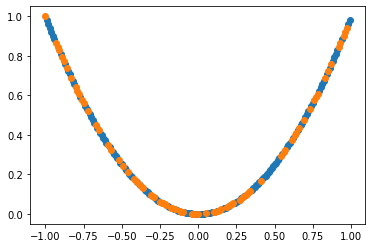

In [20]:
x=np.arange(-1, 1, 0.01)
np.random.shuffle(x)
y=x**2

split_index=int(x.shape[0]*0.6)

train_x, test_x=x[:split_index], x[split_index:]
train_y, test_y=y[:split_index], y[split_index:]

#결과를 그래프로 보기
plt.scatter(train_x, train_y)
plt.scatter(test_x, test_y)
plt.show

elapsed : 11.414215564727783
80/80 [==============================] - 0s 480us/sample - loss: 0.0039 - mean_squared_error: 0.0039
loss= 0.0038521924987435343
mse= 0.0038521923


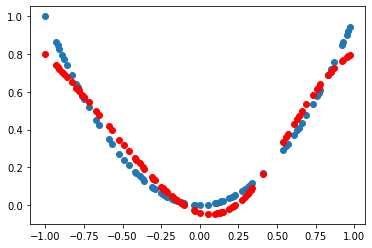

In [39]:
#모델
model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mse"])

#학습시간을 출력
start_time = time.time() #Added
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20) #train set으로 학습
print("elapsed : {}".format(time.time() - start_time)) #Added

# loss, mse = model.evaluate(x, y)
loss, mse = model.evaluate(test_x, test_y) #성능 평가는 test set으로
print("loss=",loss)
print("mse=",mse)

#y_ = model.predict(x)
y_ = model.predict(test_x)

#plt.scatter(x.y)
plt.scatter(test_x, test_y)
#plt.scatter(x, y_, color='r')
plt.scatter(test_x, y_, color='r')
plt.show()



Plot된 그림에서 test_x 의 점 사이에 빈 간격이 보임: 이 간격이 Train X에 해당함

  이후 비교를 위해 그래프를 저장해 둠

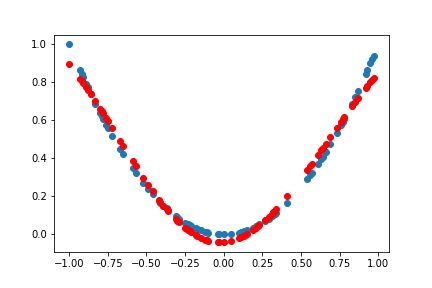

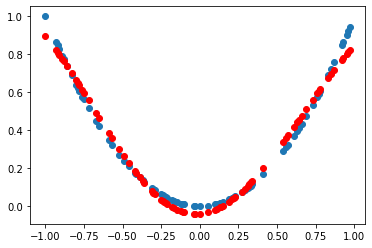

In [33]:
plt.scatter(test_x, test_y)
plt.scatter(test_x, y_, color='r')
plt.savefig("base_result.png")

from IPython.display import Image
display(Image("base_result.png"))


##Network 모양 보기

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_32 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 11.643281936645508


<function matplotlib.pyplot.show>

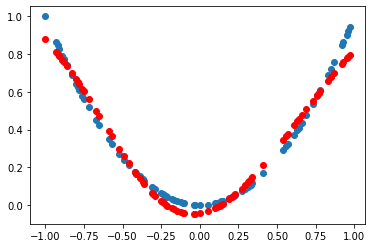

In [42]:
model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

model.compile(optimizer='SGD', loss='mse', metrics=['mse'])
model.summary() #ADDED Network 모양 보기

start_time=time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20) #modelfit...으로 잘못입력해도 모델모양은 출력. 학습만 안할뿐
print("elapsed : {}".format(time.time()-start_time))

y_=model.predict(test_x)
plt.scatter(test_x, test_y)
plt.scatter(test_x, y_, color='r')
plt.show #결과 출력

Param#는 weight 값의 갯수를 의미
네트웍의 모양이 보임. 노드10개를 갖는 은닉층 2개가 있음
모든 레이어는 activation (N*x+b)의 형태로, 

첫번째 은닉층은 20개 ((1+1)*10 = (입력수+1)*10의 weight를, 

두번째 은닉응은 110개 ((10+1)*10)의 웨이트가 있음

##Keras DNN 기본 Template
모든 코드를 포함하는 template

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_50 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_51 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 12.254878282546997
80/80 [==============================] - 0s 616us/sample - loss: 0.0013 - mean_squared_error: 0.0013
loss= 0.0013056840747594834
mse= 0.0013056841


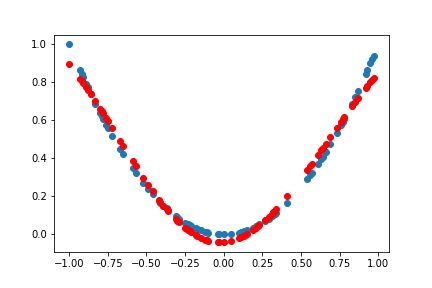

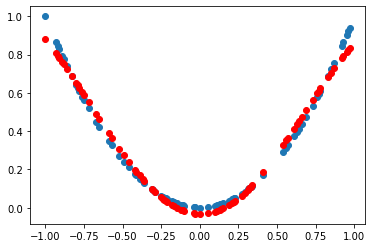

In [50]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input

import time

#모델정의
model=keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh')) 
model.add(Dense(1))

#모델 컴파일
model.compile(optimizer='SGD', loss='mse', metrics=['mse'])
model.summary()

#학습 & 시간표시
start_time=time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print('elapsed : {}'.format(time.time()-start_time))

# 함수정의 보기
# def model.fit(x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None, validation_freq=1, max_queue_size=10, workers=1, use_multiprocessing=False, **kwargs)

#평가
loss,mse=model.evaluate(test_x, test_y)
print('loss=', loss)
print('mse=', mse)

display(Image('base_result.png')) #ADDED

#예측
y_=model.predict(test_x)

#출력
plt.scatter(test_x, test_y)
plt.scatter(test_x, y_, color='r')
plt.show()

##실습 1 - 히든레이어가 없을때의 학습 양상
위의 코드를 가져와서 히든레이어를 주석처리

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
elapsed : 11.638659477233887
80/80 [==============================] - 0s 786us/sample - loss: 0.0961 - mean_squared_error: 0.0961
loss= 0.09614872485399246
mse= 0.09614872


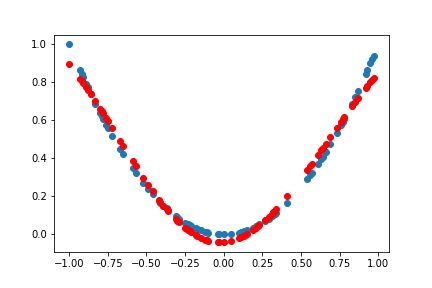

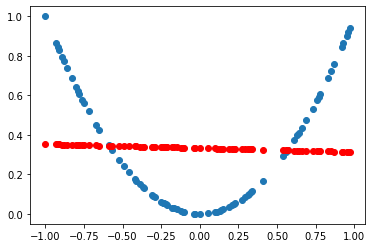

In [51]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input

import time

#모델정의
model=keras.Sequential()
model.add(Input((1,))) #ADDED
#model.add(Dense(10, activation='tanh', input_shape=(1,)))
#model.add(Dense(10, activation='tanh')) 
model.add(Dense(1))

#모델 컴파일
model.compile(optimizer='SGD', loss='mse', metrics=['mse'])
model.summary()

#학습 & 시간표시
start_time=time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print('elapsed : {}'.format(time.time()-start_time))

# 함수정의 보기
# def model.fit(x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None, validation_freq=1, max_queue_size=10, workers=1, use_multiprocessing=False, **kwargs)

#평가
loss,mse=model.evaluate(test_x, test_y)
print('loss=', loss)
print('mse=', mse)

display(Image('base_result.png')) #ADDED

#예측
y_=model.predict(test_x)

#출력
plt.scatter(test_x, test_y)
plt.scatter(test_x, y_, color='r')
plt.show()

##실습 2 - 히든레이어를 3개로
위의 코드를 가져와서 히든레이어를 추가

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_54 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_55 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_56 (Dense)             (None, 1)                 11        
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________
elapsed : 12.479526281356812
80/80 [==============================] - 0s 726us/sample - loss: 0.0015 - mean_squared_error: 0.0015
loss= 0.001527059217914939
mse= 0.0015270592


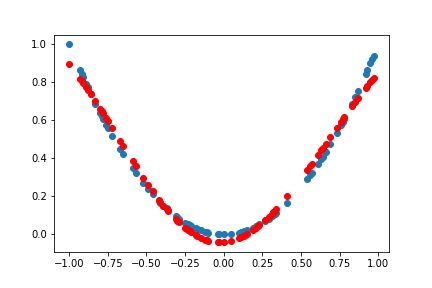

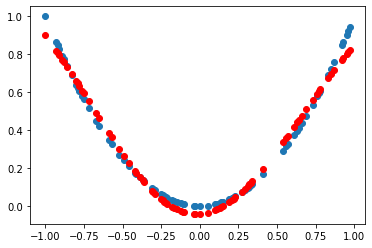

In [52]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input

import time

#모델정의
model=keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh')) 
model.add(Dense(10, activation='tanh')) #ADDED
model.add(Dense(1))

#모델 컴파일
model.compile(optimizer='SGD', loss='mse', metrics=['mse'])
model.summary()

#학습 & 시간표시
start_time=time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print('elapsed : {}'.format(time.time()-start_time))

# 함수정의 보기
# def model.fit(x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None, validation_freq=1, max_queue_size=10, workers=1, use_multiprocessing=False, **kwargs)

#평가
loss,mse=model.evaluate(test_x, test_y)
print('loss=', loss)
print('mse=', mse)

display(Image('base_result.png')) #ADDED

#예측
y_=model.predict(test_x)

#출력
plt.scatter(test_x, test_y)
plt.scatter(test_x, y_, color='r')
plt.show()

##실습 3 - Hidden layer를 5개로
위의 코드를 가져와서 히든 레이어 추가

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_58 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_59 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_60 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_61 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_62 (Dense)             (None, 1)                 11        
Total params: 471
Trainable params: 471
Non-trainable params: 0
_______________________________________________________

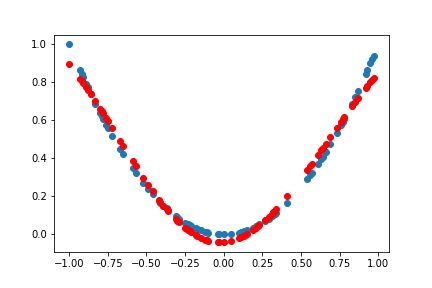

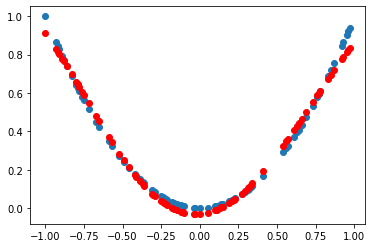

In [53]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input

import time

#모델정의
model=keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh')) 
model.add(Dense(10, activation='tanh')) #ADDED
model.add(Dense(10, activation='tanh')) #ADDED
model.add(Dense(10, activation='tanh')) #ADDED
model.add(Dense(1))

#모델 컴파일
model.compile(optimizer='SGD', loss='mse', metrics=['mse'])
model.summary()

#학습 & 시간표시
start_time=time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print('elapsed : {}'.format(time.time()-start_time))

# 함수정의 보기
# def model.fit(x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None, validation_freq=1, max_queue_size=10, workers=1, use_multiprocessing=False, **kwargs)

#평가
loss,mse=model.evaluate(test_x, test_y)
print('loss=', loss)
print('mse=', mse)

display(Image('base_result.png')) #ADDED

#예측
y_=model.predict(test_x)

#출력
plt.scatter(test_x, test_y)
plt.scatter(test_x, y_, color='r')
plt.show()

##실습 4 - Hidden layer를 10개로

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_63 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_64 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_65 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_66 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_67 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_68 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_69 (Dense)             (None, 10)              

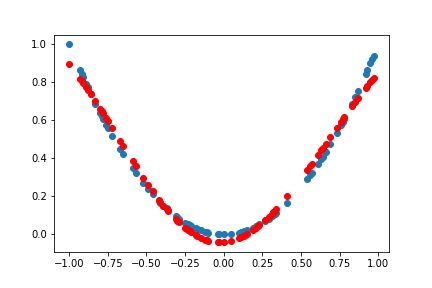

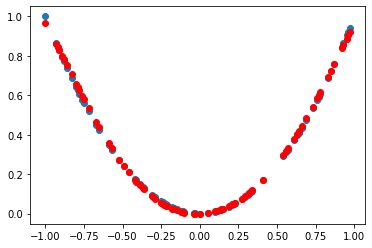

In [54]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input

import time

#모델정의
model=keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh')) 
model.add(Dense(10, activation='tanh')) #ADDED
model.add(Dense(10, activation='tanh')) #ADDED
model.add(Dense(10, activation='tanh')) #ADDED
model.add(Dense(10, activation='tanh')) #ADDED
model.add(Dense(10, activation='tanh')) #ADDED
model.add(Dense(10, activation='tanh')) #ADDED
model.add(Dense(10, activation='tanh')) #ADDED
model.add(Dense(10, activation='tanh')) #ADDED
model.add(Dense(1))

#모델 컴파일
model.compile(optimizer='SGD', loss='mse', metrics=['mse'])
model.summary()

#학습 & 시간표시
start_time=time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print('elapsed : {}'.format(time.time()-start_time))

# 함수정의 보기
# def model.fit(x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None, validation_freq=1, max_queue_size=10, workers=1, use_multiprocessing=False, **kwargs)

#평가
loss,mse=model.evaluate(test_x, test_y)
print('loss=', loss)
print('mse=', mse)

display(Image('base_result.png')) #ADDED

#예측
y_=model.predict(test_x)

#출력
plt.scatter(test_x, test_y)
plt.scatter(test_x, y_, color='r')
plt.show()

##실습 5 - Node수를 5개로 조절
Now you know what you are doing!

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_74 (Dense)             (None, 5)                 10        
_________________________________________________________________
dense_75 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_76 (Dense)             (None, 1)                 6         
Total params: 46
Trainable params: 46
Non-trainable params: 0
_________________________________________________________________
elapsed : 12.712278842926025
80/80 [==============================] - 0s 933us/sample - loss: 0.0015 - mean_squared_error: 0.0015
loss= 0.0015156527981162072
mse= 0.0015156528


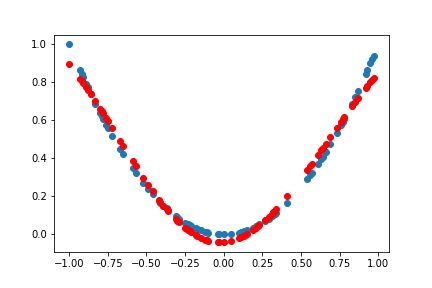

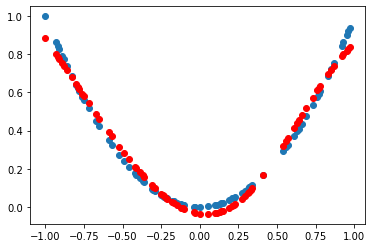

In [55]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input

import time

#모델정의
model=keras.Sequential()
model.add(Dense(5, activation='tanh', input_shape=(1,)))
model.add(Dense(5, activation='tanh')) 
model.add(Dense(1))

#모델 컴파일
model.compile(optimizer='SGD', loss='mse', metrics=['mse'])
model.summary()

#학습 & 시간표시
start_time=time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print('elapsed : {}'.format(time.time()-start_time))

# 함수정의 보기
# def model.fit(x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None, validation_freq=1, max_queue_size=10, workers=1, use_multiprocessing=False, **kwargs)

#평가
loss,mse=model.evaluate(test_x, test_y)
print('loss=', loss)
print('mse=', mse)

display(Image('base_result.png')) #ADDED

#예측
y_=model.predict(test_x)

#출력
plt.scatter(test_x, test_y)
plt.scatter(test_x, y_, color='r')
plt.show()

##실습 6 - Node 수를 더 작게

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_77 (Dense)             (None, 2)                 4         
_________________________________________________________________
dense_78 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_79 (Dense)             (None, 1)                 3         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________
elapsed : 13.18108344078064
80/80 [==============================] - 0s 977us/sample - loss: 0.0018 - mean_squared_error: 0.0018
loss= 0.0017584945540875196
mse= 0.0017584946


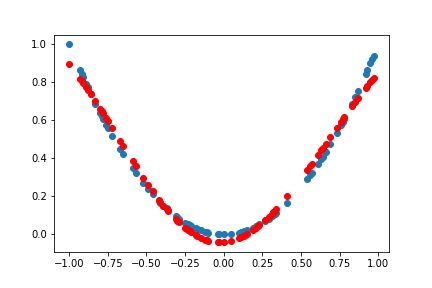

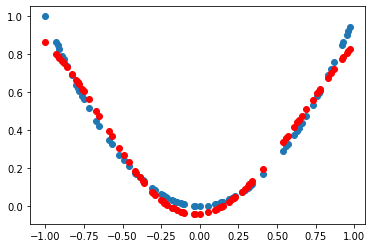

In [56]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input

import time

#모델정의
model=keras.Sequential()
model.add(Dense(2, activation='tanh', input_shape=(1,)))
model.add(Dense(2, activation='tanh')) 
model.add(Dense(1))

#모델 컴파일
model.compile(optimizer='SGD', loss='mse', metrics=['mse'])
model.summary()

#학습 & 시간표시
start_time=time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print('elapsed : {}'.format(time.time()-start_time))

# 함수정의 보기
# def model.fit(x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None, validation_freq=1, max_queue_size=10, workers=1, use_multiprocessing=False, **kwargs)

#평가
loss,mse=model.evaluate(test_x, test_y)
print('loss=', loss)
print('mse=', mse)

display(Image('base_result.png')) #ADDED

#예측
y_=model.predict(test_x)

#출력
plt.scatter(test_x, test_y)
plt.scatter(test_x, y_, color='r')
plt.show()

##실습 7 - Node 수 1개로

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_80 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_81 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_82 (Dense)             (None, 1)                 2         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________
elapsed : 12.693833827972412
80/80 [==============================] - 0s 961us/sample - loss: 0.0961 - mean_squared_error: 0.0961
loss= 0.09612999856472015
mse= 0.09613


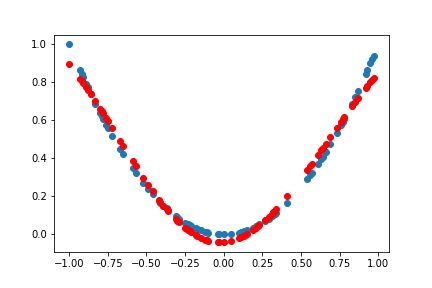

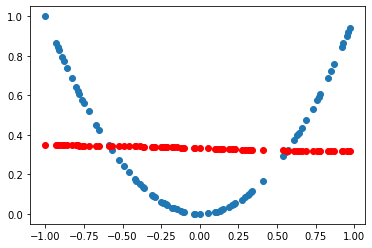

In [57]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input

import time

#모델정의
model=keras.Sequential()
model.add(Dense(1, activation='tanh', input_shape=(1,)))
model.add(Dense(1, activation='tanh')) 
model.add(Dense(1))

#모델 컴파일
model.compile(optimizer='SGD', loss='mse', metrics=['mse'])
model.summary()

#학습 & 시간표시
start_time=time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print('elapsed : {}'.format(time.time()-start_time))

# 함수정의 보기
# def model.fit(x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None, validation_freq=1, max_queue_size=10, workers=1, use_multiprocessing=False, **kwargs)

#평가
loss,mse=model.evaluate(test_x, test_y)
print('loss=', loss)
print('mse=', mse)

display(Image('base_result.png')) #ADDED

#예측
y_=model.predict(test_x)

#출력
plt.scatter(test_x, test_y)
plt.scatter(test_x, y_, color='r')
plt.show()